## Определение региона с наибольшей прибыльностью добычи нефти

### 1. Изучение и подготовка данных

Импортируем необходимые библиотеки.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Прочитаем файлы *geo_data_0.csv*, *geo_data_1.csv*, *geo_data_2.csv* и сохраним их в словаре *data* с ключами 0, 1, 2 соответственно. Посмотрим датасеты и общую информацию о них.

In [2]:
data = {}
for i in range(3):
    data[i] = pd.read_csv('geo_data_' + str(i) + '.csv')
    print('Регион', str(i) + ':')
    display(data[i])
    data[i].info()
    if i < 2:
        print('—' * 50 + '\n')

Регион 0:


,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
...,...,...,...,...,...
99995,DLsed,0.971957,0.370953,6.075346,110.744026
99996,QKivN,1.392429,-0.382606,1.273912,122.346843
99997,3rnvd,1.029585,0.018787,-1.348308,64.375443
99998,7kl59,0.998163,-0.528582,1.583869,74.040764


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.4+ MB
——————————————————————————————————————————————————

Регион 1:


,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305
...,...,...,...,...,...
99995,QywKC,9.535637,-6.878139,1.998296,53.906522
99996,ptvty,-10.160631,-12.558096,5.005581,137.945408
99997,09gWa,-7.378891,-3.084104,4.998651,137.945408
99998,rqwUm,0.665714,-6.152593,1.000146,30.132364


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.4+ MB
——————————————————————————————————————————————————

Регион 2:


,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746
...,...,...,...,...,...
99995,4GxBu,-1.777037,1.125220,6.263374,172.327046
99996,YKFjq,-1.261523,-0.894828,2.524545,138.748846
99997,tKPY3,-1.199934,-2.957637,5.219411,157.080080
99998,nmxp2,-2.419896,2.417221,-5.548444,51.795253


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.4+ MB


Каждый из датафреймов содержит 5 столбцов и 100000 строк. Пропущенные значения отсутствуют. Исследуем численные признаки более подробно. Для этого построим гисторгаммы распределения значений, а также графики "ящик с усами".

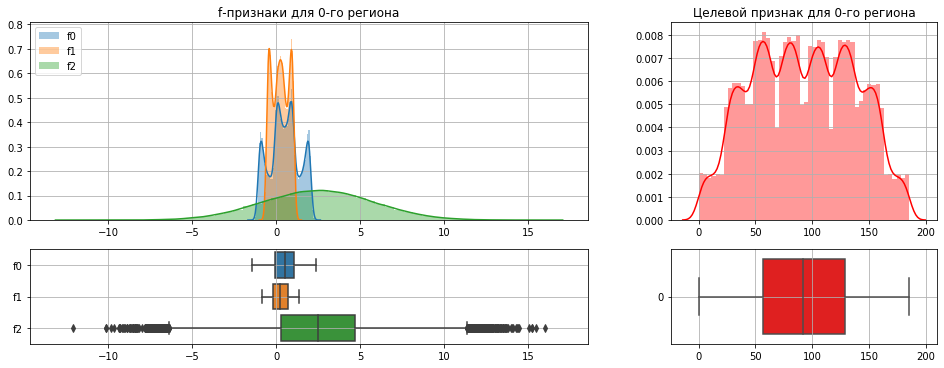

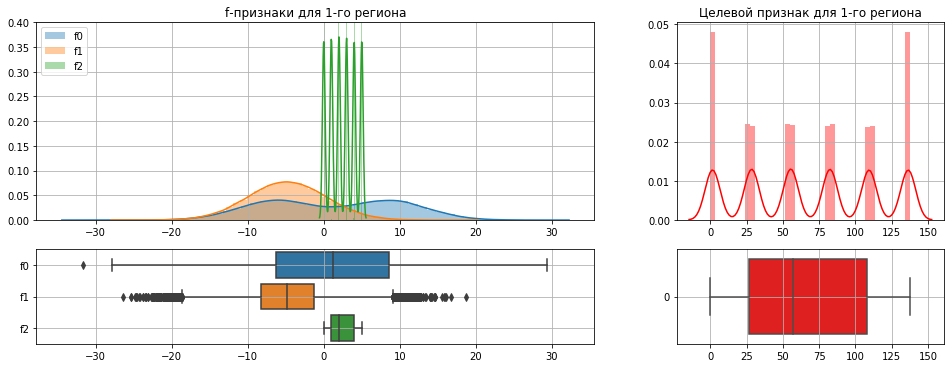

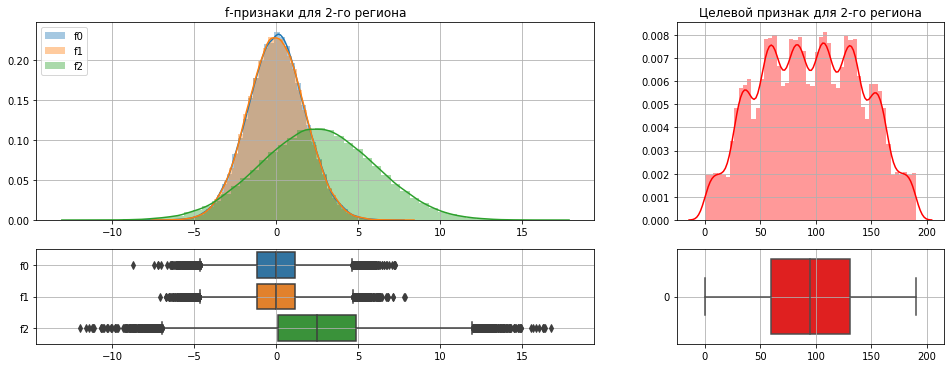

In [3]:
numeric = ['f0', 'f1', 'f2']

for i in range(3):
    fig = plt.figure()
    fig.set_size_inches(22, 8)
    ax1 = fig.add_subplot(2, 2, 1)
    ax2 = fig.add_subplot(2, 4, 3)
    ax3 = fig.add_subplot(4, 2, 5)
    ax4 = fig.add_subplot(4, 4, 11)
    # гистограммы для f-признаков
    sns.distplot(data[i]['f0'], ax=ax1)
    sns.distplot(data[i]['f1'], ax=ax1)
    sns.distplot(data[i]['f2'], ax=ax1)
    ax1.set_title('f-признаки для ' + str(i) + '-го региона')
    ax1.legend(numeric, loc = 'upper left')
    ax1.set_xlabel('')
    ax1.grid(True)
    if i == 1:
        ax1.set_ylim(0, 0.4)
    else:
        ax1.set_ylim(False)
    # гистограмма для целевого признака
    sns.distplot(data[i]['product'], color='r', ax=ax2)
    ax2.set_title('Целевой признак для ' + str(i) + '-го региона')
    ax2.set_xlabel('')
    ax2.grid(True)
    # ящики с усами для f-признаков
    sns.boxplot(data=data[i][numeric], orient='h', ax=ax3)
    ax3.grid(True)
    ax3.set_xlim(ax1.get_xlim())
    # ящик с усами для целевого признака
    sns.boxplot(data=data[i]['product'], orient='h', color='r', ax=ax4)
    ax4.grid(True)
    ax4.set_xlim(ax2.get_xlim())

По полученным графикам заметна сильная неоднородность данных. Значения одной части признаков распределны нормально, а другой — имеют от двух до шести пиков, что указывает на возможное присутствие сразу нескольких кластеров. Значения целевого признака 1-го региона распределены иначе и концентрируются на небольших равноудалённых отрезках оси.

Данные с уникальным идентификатором скважины (*id*) не являются значимыми при определении объёмов сырья. Удалим соответствующие столбцы, а также выделим целевые признаки.

In [4]:
features = {}
target = {}
for i in range(3):
    # удаление столбцов с id
    data[i] = data[i].drop('id', axis=1)
    # выделение целевого признака
    features[i] = data[i].drop(['product'], axis=1)
    target[i] = data[i]['product']
    # печать
    print('Регион', str(i) + ':\n\nfeatures')
    display(features[i])
    print('target')
    display(target[i])
    if i < 2:
        print('—' * 45 + '\n')

Регион 0:

features


,f0,f1,f2
0,0.705745,-0.497823,1.221170
1,1.334711,-0.340164,4.365080
2,1.022732,0.151990,1.419926
3,-0.032172,0.139033,2.978566
4,1.988431,0.155413,4.751769
...,...,...,...
99995,0.971957,0.370953,6.075346
99996,1.392429,-0.382606,1.273912
99997,1.029585,0.018787,-1.348308
99998,0.998163,-0.528582,1.583869


target


0        105.280062
1         73.037750
2         85.265647
3        168.620776
4        154.036647
            ...    
99995    110.744026
99996    122.346843
99997     64.375443
99998     74.040764
99999    149.633246
Name: product, Length: 100000, dtype: float64

—————————————————————————————————————————————

Регион 1:

features


,f0,f1,f2
0,-15.001348,-8.276000,-0.005876
1,14.272088,-3.475083,0.999183
2,6.263187,-5.948386,5.001160
3,-13.081196,-11.506057,4.999415
4,12.702195,-8.147433,5.004363
...,...,...,...
99995,9.535637,-6.878139,1.998296
99996,-10.160631,-12.558096,5.005581
99997,-7.378891,-3.084104,4.998651
99998,0.665714,-6.152593,1.000146


target


0          3.179103
1         26.953261
2        134.766305
3        137.945408
4        134.766305
            ...    
99995     53.906522
99996    137.945408
99997    137.945408
99998     30.132364
99999      3.179103
Name: product, Length: 100000, dtype: float64

—————————————————————————————————————————————

Регион 2:

features


,f0,f1,f2
0,-1.146987,0.963328,-0.828965
1,0.262778,0.269839,-2.530187
2,0.194587,0.289035,-5.586433
3,2.236060,-0.553760,0.930038
4,-0.515993,1.716266,5.899011
...,...,...,...
99995,-1.777037,1.125220,6.263374
99996,-1.261523,-0.894828,2.524545
99997,-1.199934,-2.957637,5.219411
99998,-2.419896,2.417221,-5.548444


target


0         27.758673
1         56.069697
2         62.871910
3        114.572842
4        149.600746
            ...    
99995    172.327046
99996    138.748846
99997    157.080080
99998     51.795253
99999    102.775767
Name: product, Length: 100000, dtype: float64

### Вывод

В ходе подготовки данных были исследованы распределения значений численных признаков, удалены лишние столбцы, выделены целевые признаки.

### 2. Обучение и проверка модели

Разобьём данные на обучающую и валидационную выборки в соотношении 75:25.

In [5]:
features_train = {}
features_valid = {}
target_train = {}
target_valid = {}
for i in range(3):
    features_train[i], features_valid[i], target_train[i], target_valid[i] = (
        train_test_split(features[i], target[i], test_size=0.25, random_state=1))
    print('Регион', str(i) + ':')
    print(' ' * 15 + 'features   target')
    print('Тренировочная:', features_train[i].shape, target_train[i].shape)
    print('Валидационная:', features_valid[i].shape, target_valid[i].shape)
    if i < 2:
        print('—' * 35 + '\n')

Регион 0:
               features   target
Тренировочная: (75000, 3) (75000,)
Валидационная: (25000, 3) (25000,)
———————————————————————————————————

Регион 1:
               features   target
Тренировочная: (75000, 3) (75000,)
Валидационная: (25000, 3) (25000,)
———————————————————————————————————

Регион 2:
               features   target
Тренировочная: (75000, 3) (75000,)
Валидационная: (25000, 3) (25000,)


Обучим модель линейной регрессии, получим предсказания и рассчитаем квадратный корень из средней квадратичной ошибки (*RMSE*), коэффициент детерминации (*R2*) и среднее значение предсказанного объёма сырья (*Mean*) для каждого региона.

In [6]:
predicted = {}
scores = {}
for i in range(3):
    # обучение модели и получение предсказаний
    model = LinearRegression()
    model.fit(features_train[i], target_train[i])
    predicted[i] = pd.Series(model.predict(features_valid[i]), 
                                  index=features_valid[i].index)
    # расчёт метрик
    rmse = mean_squared_error(target_valid[i], predicted[i]) ** 0.5
    r2 = r2_score(target_valid[i], predicted[i])
    predicted_mean = predicted[i].mean()
    # запись результатов
    scores[i] = [rmse, r2, predicted_mean]
    
pd.DataFrame(scores, index=['RMSE', 'R2', 'Mean']).transpose()

,RMSE,R2,Mean
0,37.742587,0.277281,92.492625
1,0.894338,0.999622,69.120405
2,39.866711,0.200034,94.956830


### Вывод

*R2* для всех регионов оказались выше 0, что говорит об адекватности моделей. При этом значение *R2* для 1-го региона почти равно единице, следовательно, модель предсказывает объёмы сырья с высокой степенью точности. Это подтверждает и величина *RMSE*, которая составляет 0.89 тыс. баррелей при среднем значении предсказания, равном 69 тыс. баррелей. Более плохие результаты модель показала на данных 0-го и 2-го регионов, где величина корня из средней квадратичной ошибки и среднее значение предсказания имеют один порядок, различаясь лишь в ~2.5 раза. Метрики *R2* для этих регионов хоть и превышают соответствующие показатели при заполнении средними значениями, но также находятся на относительно низком уровне.

### 3. Подготовка к расчёту прибыли

Рассчитаем достаточный объём сырья для безубыточной разработки новой скважины.

In [7]:
BUDGET = 10e9
UNIT_INCOME = 450e3
NUMBER_OF_WELLS = 200

breakeven_volume = BUDGET / UNIT_INCOME / NUMBER_OF_WELLS
print('Точка безубыточности: {:.2f} тыс. баррелей'.format(breakeven_volume))

Точка безубыточности: 111.11 тыс. баррелей


### Вывод

Точка безубыточности оказалась выше, чем среднее значение объёма сырья для любого из рассмотренных регионов. Однако по построенным на этапе исследования данных графикам видно, что полученная величина находится в зависимости от региона либо между 2 и 3, либо между 3 и 4 квартилями. Следовательно, безубыточность разработки возможно достигнуть только при выборе лучших скважин.

### 4. Расчёт прибыли и рисков 

С применением техники *Bootstrap* выделим 1000 выборок по 500 объектов с предсказанными объёмами сырья. Для каждой из них с помощью функции *income* определим лучшие 200 скважин и рассчитаем по ним прибыль, исходя из данных о реальных запасах. Найдём среднюю прибыль, 95%-е доверительные интервалы прибыли и среденей прибыли, а также риск убытков для каждого региона.

In [10]:
# функция для расчёта прибыли по выбранным скважинам
def income(predicted_subsample):
    best_wells = predicted_subsample.sort_values(ascending=False)[:NUMBER_OF_WELLS]
    real_wells = target_valid[i].loc[best_wells.index]
    oil_volume = real_wells.sum()
    return oil_volume * UNIT_INCOME
    
state = np.random.RandomState(1)
profit_values = {}

for i in range(3):
    profit_values[i] = []
    # bootstrap с 1000 выборок по 500 объектов
    for j in range(1000):
        predicted_subsample = predicted[i].sample(frac=0.02, replace=True, random_state=state)
        profit_values[i].append(income(predicted_subsample) - BUDGET)
    # расчёт метрик
    profit_values[i] = pd.Series(profit_values[i])
    mean_profit = profit_values[i].mean()
    mean_profit_сonfidence_interval = st.t.interval(0.95,
                                                    len(profit_values[i])-1,
                                                    profit_values[i].mean(),
                                                    profit_values[i].sem())
    profit_сonfidence_interval = [profit_values[i].quantile(0.025), profit_values[i].quantile(0.975)]
    risk_of_loss = (profit_values[i] < 0).sum() / len(profit_values[i])
    # печать результатов
    print('Регион', str(i) + ':\n')
    print('Средняя прибыль: {:.2f} млн. руб.'.format(mean_profit/1e6))
    print('95%-й доверительный интервал средней прибыли: {:.2f} — {:.2f} млн. руб.'
          .format(mean_profit_сonfidence_interval[0]/1e6, mean_profit_сonfidence_interval[1]/1e6))
    print('95%-й доверительный интервал прибыли: {:.2f} — {:.2f} млн. руб.'
          .format(profit_сonfidence_interval[0]/1e6, profit_сonfidence_interval[1]/1e6))
    print('Риск убытков: {:.2%}'.format(risk_of_loss))
    if i < 2:
        print('—' * 75 + '\n')

Регион 0:

Средняя прибыль: 433.01 млн. руб.
95%-й доверительный интервал средней прибыли: 416.50 — 449.52 млн. руб.
95%-й доверительный интервал прибыли: -100.24 — 947.11 млн. руб.
Риск убытков: 5.20%
———————————————————————————————————————————————————————————————————————————

Регион 1:

Средняя прибыль: 483.36 млн. руб.
95%-й доверительный интервал средней прибыли: 470.41 — 496.31 млн. руб.
95%-й доверительный интервал прибыли: 87.44 — 885.72 млн. руб.
Риск убытков: 0.60%
———————————————————————————————————————————————————————————————————————————

Регион 2:

Средняя прибыль: 392.67 млн. руб.
95%-й доверительный интервал средней прибыли: 376.14 — 409.21 млн. руб.
95%-й доверительный интервал прибыли: -107.12 — 932.25 млн. руб.
Риск убытков: 7.20%


### Вывод

Несмотря на то, что по результатам второго шага в регионе 1 выявлен наименьший средний объём сырья, за счёт высокой точности предсказания модели удалось достичь наилучших показателей при выборе 200 самых перспективных скважин. Средняя прибыль в 1-м регионе составила 483.36 млн. рублей, а риск убытков — 0.6%. При этом с 95%-й вероятностью прибыль будет находиться в интервале от 87.44 до 885.72 млн. рублей. Средние показатели прибыли в 0-м и 2-м регионах оказались ниже, чем в 1-м — 433.01 и 392.67 млн. рублей соответственно. Кроме того, шансы получить убыток составили 5.2% и 7.2%, что делает добычу нефти в указанных регионах гораздо более рискованной. 

Таким образом, только регион 1 удовлетворяет условию по максимальному риску убытков (2.5%), при этом обеспечивая наилучшие потенциальные показатели прибыли, следовательно, является наиболее перспективным для разработки месторождений.